# ASTR2013 - Tutorial 1

#### Student Number: <span style="color:blue"> u6772166 </span>

#### Due Date: <span style="color:blue"> Complete during tutorial if you can - otherwise in your own time before week 2.  </span>

<a id="contents"></a>
# Contents:
***
[Modules](#immod)
---
***
[Question 1](#q1)
---
   - [Part A](#1pa) 
   - [Part B](#1pb)
***
[Question 2](#q2)
---
   - [Part A](#2pa) 
   - [Part B](#2pb)
   - [Part C](#2pc)
   - [Part D](#2pd)
   - [Part E](#2pe)
***
[Question 3](#q3)
---
   - [Part A](#3pa) 
   - [Part B](#3pb)
   - [Part C](#3pc)
   - [Part D](#3pd)
   - [Part E](#3pe)

***
<a id="immod"></a>
## Modules

Press Shift-Enter (or the "Run" button) when the next cell is selected to run it. It is important that you import the modules before running further code blocks.

[Back](#contents)

In [1]:
import astropy.constants as c, astropy.units as u
import numpy as np, matplotlib.pyplot as plt

## Examples

Here are some example python commands that you'll find useful below. Note that you can run many functions in a single cell. Press Shift-Enter to run the cell. Note that comments within the python block use the # symbol.

In [2]:
#A simple print statement
print("The number of parsecs in a light year is:")
#Formatting a print statement
pc_in_ly = (c.c*u.yr).to(u.pc).value
print("{:5.2f}".format(pc_in_ly))

The number of parsecs in a light year is:
 0.31


In [5]:
help(u);
help(c)

Help on package astropy.units in astropy:

NAME
    astropy.units

DESCRIPTION
    This subpackage contains classes and functions for defining and converting
    between different physical units.
    
    This code is adapted from the `pynbody
    <https://github.com/pynbody/pynbody>`_ units module written by Andrew
    Pontzen, who has granted the Astropy project permission to use the
    code under a BSD license.

PACKAGE CONTENTS
    astrophys
    cds
    cgs
    core
    decorators
    deprecated
    equivalencies
    format (package)
    function (package)
    imperial
    photometric
    physical
    quantity
    quantity_helper (package)
    required_by_vounit
    si
    tests (package)
    utils

SUBMODULES
    function_units
    magnitude_zero_points

DATA
    A = Unit("A")
    AA = Unit("Angstrom")
    AB = Unit("AB")
    ABflux = Unit("AB")
    ABmag = Unit("mag(AB)")
    AU = Unit("AU")
    Angstrom = Unit("Angstrom")
    B = Unit("byte")
    Ba = Unit("Ba")
    Barye = Uni

Text(0, 0.5, 'y')

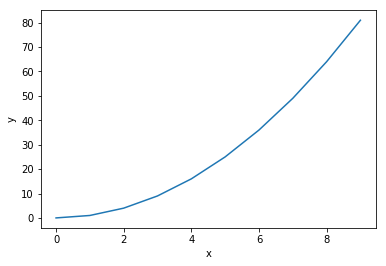

In [3]:
#Making a simple plot of a parabola. Raising something to the power is **
x = np.arange(10)
y = x**2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [6]:
#Some constants you'll need below and formatting
print("Boltzman's constant in cgs units: " + str(c.k_B.cgs))
print("Boltzman's constant in SI units: " + str(c.k_B.si))
print("Boltzman's constant in SI units to 3 decimal places: {:10.3e}".format(c.k_B.si))
print("Boltzman's constant in SI units (value only) to 3 decimal places: {:10.3e} J/K".format(c.k_B.si.value))
#Now lets print everything with 3 decimal places...
print("Planck's constant in default (SI) units: {:10.3e}".format(c.h))
print("Planck's constant in cgs units: {:10.3e}".format(c.h.cgs))
print("Stefan-Boltzman constant in default (SI) units: {:10.3e}".format(c.sigma_sb))
print("Stefan-Boltzman constant in cgs units: {:10.3e}".format(c.sigma_sb))

Boltzman's constant in cgs units: 1.38064852e-16 erg / K
Boltzman's constant in SI units:   Name   = Boltzmann constant
  Value  = 1.38064852e-23
  Uncertainty  = 7.9e-30
  Unit  = J / K
  Reference = CODATA 2014
Boltzman's constant in SI units to 3 decimal places:  1.381e-23 J / K
Boltzman's constant in SI units (value only) to 3 decimal places:  1.381e-23 J/K
Planck's constant in default (SI) units:  6.626e-34 J s
Planck's constant in cgs units:  6.626e-27 erg s
Stefan-Boltzman constant in default (SI) units:  5.670e-08 W / (K4 m2)
Stefan-Boltzman constant in cgs units:  5.670e-08 W / (K4 m2)


***
<a id="q1"></a>
## Question 1
(based on Textbook 1.1 - try the rest of that question in your own time as suggested study)

[Back](#contents)

<a id="1pa"></a>
### Part A
Calculate the best possible angular resolution of the human eye. Assume a 0.5cm pupil diameter and a 0.5 $\mu$m wavelength. Express in arcminutes. 

Note that in astropy, you can convert to radians when using the small angle formula by multiplying by `c.rad` or by using the `np.arctan()` function.

The human eye with so-called 20/20 vision typically has an angular resolution of only 1 arcminute. What pupil diameter does this correspond to? Discuss with your neighbours the limiting factors for human eye resolution, and environmental factors that might change this.

In [38]:
def res(lambd, D):
    theta = (1.22*(lambd).to(u.centimeter))/D.to(u.cm)*u.rad
    theta = theta.to(u.arcmin)
    return theta

In [39]:
lambd = 0.5*u.micrometer
D = 0.5*u.centimeter
res(lambd, D)

<Quantity 0.41940511 arcmin>

In [33]:
theta = (1*u.arcmin).to(u.rad)/u.rad
D = (1.22*lambd/theta).to(u.cm)
D

<Quantity 0.20970255 cm>

<a id="1pb"></a>
### Part B

50 years ago, the Honeysuckle Creek tracking station used a 2.2 GHz frequency to view the Apollo 11 lunar module and receive the signals from Neil Armstrong landing on the moon. The dish diameter was 26 m, and effectively acted as a telescope with a single pixel. What was the wavelength corresponding to this transmission frequency? What was the angular resolution of this dish at this wavelength? How did it compare to the size of the moon, and would it have mattered if the Lunar Module landed in the wrong place by 10 km? 

In [41]:
nu = 2.2e9*u.Hertz
lambd = c.c/nu
print('wavelength %f'%lambd)
D = 26*u.m
res = res(lambd,D)
print('angular resolution %f'%res)

wavelength %f 0.1362692990909091 m / (Hz s)
angular resolution %f 21.981553782554535 arcmin


***
<a id="q2"></a>
## Question 2

(based on Textbook 1.2)

A CCD detector at the focal plane of a 1m diameter telescope records the image of a star. Due to the blurring effect of the atmosphere (i.e. "seeing"), the light from the star is spread over a circular area of radius R pixels. The total number of photoelectrons over this area, accumulated during the exposure, and due to the light of the star, is $N_\text{star}$. Light from the sky produces $n_\text{sky}$ photoelectrons per pixel in the same exposure.

[Back](#contents)

<a id="2pa"></a>
### Part A

Ignore the photon-electrons from the sky (i.e. assume $n_\text{sky} = 0$). Assuming Poisson statistics, the "noise" is given by the expected number of collected photons over an exposure. What is the signal to noise ratio (S/N) for a measurement of the brightness of this star? Answer in a workbook or in the box below. 

Assuming Poisson statistics, the "noise" is given by the expected number of collected photons over an exposure
S = $N_{star}$

N = $\sqrt {N_{star}}$

S/N = $\sqrt {N_{star}}$

<a id="2pb"></a>
### Part B

Now assume that $n_\text{sky}$ is non-zero, and write down a formula for (S/N) of the photometric measurement of the star (in a workbook or in the box).

N = $\sqrt {N_{star}+n_{sky}}$
$$ \frac{S}{N} = \frac{N_{star}}{\sqrt {N_{star}+n_{sky}}}$$

<a id="2pc"></a>
### Part C

Now assume that the star is observed with a 10m diameter telescope. This will collect more photons from both the sky and the star. How much does this increase the signal-to-noise ratio?

N'=100N
\frac{S'}{N'}=10\frac{S}{N}

<a id="2pd"></a>
### Part D

Now assume that the star is observed through a less turbulent atmosphere, improving the seeing by a factor of 3. This means that the star image is now spread over R/3 pixels, while the sky brightness in each pixel is the same. What factor does this improve the S/N by?

$N_{sky}'=N_{sky}/3$

<a id="2pe"></a>
### Part E

Lets try some real numbers. For Proxima Centauri has a visual magnitude of 11.1 (more on this Week 6), which means that between 500 and 600nm, $3.6 \times 10^5$ photons per square meter arrive at the top of the atmosphere each second from this star. The atmosphere is 90% transparent at visible wavelengths (as long as there are not clouds!), and in each square arcsecond of solid angle, the sky has a brightness of 600 photons per second. Assume the telescope is 50% efficient and that the star image size has a radius of 2 arcseconds. What is the photometric signal to noise ratio for a 1 second observation of this star? [hint - this question will be easier to answer if you define variables for each part of the answer]

In [40]:
n_star = 3.6e5
n_sky = 600
tf = 0.9
T_diam = 
N_star = tf*
N_sky

eff = 0.5
N_star_r =
N_sky_r = 
StoN= 

SyntaxError: invalid syntax (<ipython-input-40-9cd5b77e6b19>, line 3)

***
<a id="q3"></a>
## Question 3

(based on Question 2.1 in the textbook)

Create a `python` script in this notebook that numerically computes the integral under the Planck function
for a temperature of 5770 K (the blackbody equivalent, or 'effective' temperature of the sun). To do this, you will first need to define an array `nu` e.g.:


`nu = 1e12*np.arange(1,1e4)*u.Hz`

This creates an array in 1 THz increments up to a frequency of 10$^{16}$ Hz. You can try alternatives to this, e.g. using the `u.Thz` unit directly. Next create an array $B$ using the Planck radiation formula and use the `np.trapz` functions to compute the integral. Use a search engine or the `help` command e.g. `help np.trapz` to find out how to use this. 

[Back](#contents)

<a id="3pa"></a>
### Part A

In [17]:
T=5770*u.K
nu = np.arange(1,1e4)*u.THz
B = 2*np.pi*c.h*nu**3/c.c**2/(np.exp(c.h*nu/c.k_B/T)-1)
F = np.trapz(B, nu)
F.to(u.MW/u.m**2)

<Quantity 62.85131778 MW / m2>

<a id="3pb"></a>
### Part B

Now compute exactly the same quantity using the Stefan-Boltzmann law.

In [19]:
F = c.sigma_sb*T**4
F.to(u.MW/u.m**2)

<Quantity 62.85132259 MW / m2>

<a id="3pc"></a>
### Part C

The flux we receive at earth is diluted from this flux by the inverse square law. Using the astropy constants `c.au` and `c.R_sun`, compute the flux received at Earth in Watts per square m.

In [13]:
# F_earth = F*4*np.pi*c.R_sun**2/4/np.pi/c.au**2
F_earth = F*c.R_sun**2/c.au**2
F_earth.to(u.watt/u.m**2)

<Quantity 1359.27575442 W / m2>

<a id="3pd"></a>
### Part D

The angular diameter of the sun is 0.57 degrees when viewed from earth, according to the textbook. Verify this using the constants module of `astropy` (which you've imported as `c`). Calculate the solid angle subtended by the sun, in steradians.

In [20]:
angular_diameter = 2*c.R_sun/c.au*u.rad
angular_diameter.to(u.deg)
sun_solid_angle = np.pi

<Quantity 0.53290429 deg>

<a id="3pe"></a>
### Part E

Approxiomating the sun as a *uniform-disk*, which has constant specific intensity accross its surface, what is the frequency integrated specific intensity in the direction of the center of the sun. How would this change if instead you viewed the sun from a distance of 1pc instead of 1au?

In [16]:
F_1 = F*np.pi*c.R_sun**2/4/np.pi/c.au**2
F_2 = F*np.pi*c.R_sun**2/4/np.pi/c.pc**2
print(F_1,F_2)

3.398189386046641e-46 J s3 THz4 / m2 7.987250638428454e-57 J s3 THz4 / m2
